In [24]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#define constants and initial conditions
Tr = 22 #Room temperature in Celcius
Ti = 90 #Initial coffee temperature in Celcius

In [68]:
#Euler's Method of finding y-values from a first order ODE
#Inputs:
#    y0 = initial y-value (dependent variable)
#    t0 = initial t-value (independent variable)
#    tf = final t-value (independent variable)
#    dt = step size of t
#    derivative = function to be integrated (first order ODE)
#Outputs:
#    t = array of t-values
#    y = array of y-values

def EulerMethod(y0, t0, tf, dt, derivative):
    #define array of t-values spanning from inital to final using the step size
    t = np.arange(t0, tf+(dt/2), dt)
    n_steps = len(t) #number of points between inital and final t-values

    #define zer0-array of y-values corresponding to the above t-values
    y = np.zeros(n_steps)
    y[0] = y0 #set inital y-value to y0
    
    #iterate through all points in t-array
    for n in range(n_steps-1):
        f = derivative(y[n], t[n]) #find derivative at the current point
        y[n+1] = y[n] + dt*f #calculate next y-value using Euler's method
        
    #return the final t and y-value arrays
    return (t,y)

In [69]:
#define function that's our first order ODE
def CoffeeDeriv(T, t):
    DerivTemp = -0.00764*(T-Tr) #-0.00764 in minutes
    return DerivTemp

In [72]:
#5 second intervals
t1, T1 = EulerMethod(Ti, 0, 45, (5/60), CoffeeDeriv)
index1 = int(30*(60/5))
print("5 second intervals at 30 minutes: " + str(T1[index1]) + " degrees Celcius")

#30 second intervals
t2, T2 = EulerMethod(Ti, 0, 45, (30/60), CoffeeDeriv)
index2 = int(30*(60/30))
print("30 second intervals at 30 minutes: " + str(T2[index2]) + " degrees Celcius")

#1 min intervals
t3, T3 = EulerMethod(Ti, 0, 45, 1, CoffeeDeriv)
index3 = int(30)
print("1 minute intervals at 30 minutes: " + str(T3[index3]) + " degrees Celcius")

#5 min intervals
t4, T4 = EulerMethod(Ti, 0, 45, 5, CoffeeDeriv)
index4 = int(30/5)
print("5 minute intervals at 30 minutes: " + str(T4[index4]) + " degrees Celcius")

5 second intervals at 30 minutes: 76.06757819400462 degrees Celcius
30 second intervals at 30 minutes: 76.04779864387505 degrees Celcius
1 minute intervals at 30 minutes: 76.02396130566802 degrees Celcius
5 minute intervals at 30 minutes: 75.82915335613369 degrees Celcius


The "best" answer in my opinion is the 76.067 degrees associated with the 5 second interval, because it's the smallest (and thus most accurate) step size.

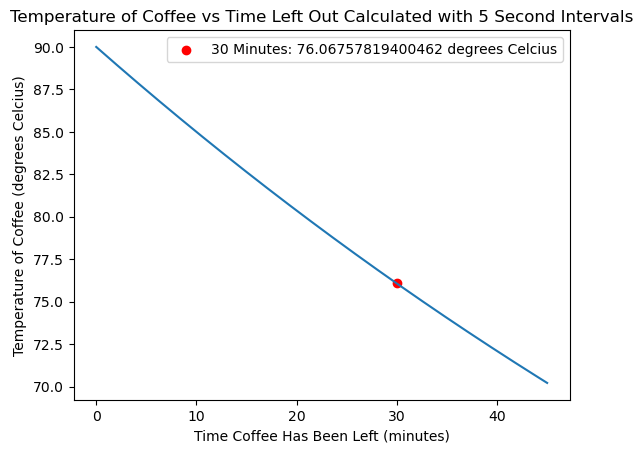

In [76]:
#plot the Temperature vs Time Left Out using 1 minute intervals
plt.plot(t1, T1)
plt.scatter(30, T1[index1], color='r', label="30 Minutes: " + str(T1[index1]) + " degrees Celcius")
plt.legend()
plt.xlabel("Time Coffee Has Been Left (minutes)")
plt.ylabel("Temperature of Coffee (degrees Celcius)")
plt.title("Temperature of Coffee vs Time Left Out Calculated with 5 Second Intervals")
plt.show()